classification - kNearest Neighbor

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Manoj-A-Thomas/data/data/winequality-red.csv', ';')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 149.9 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0C558ED0>,
      dtype=object)

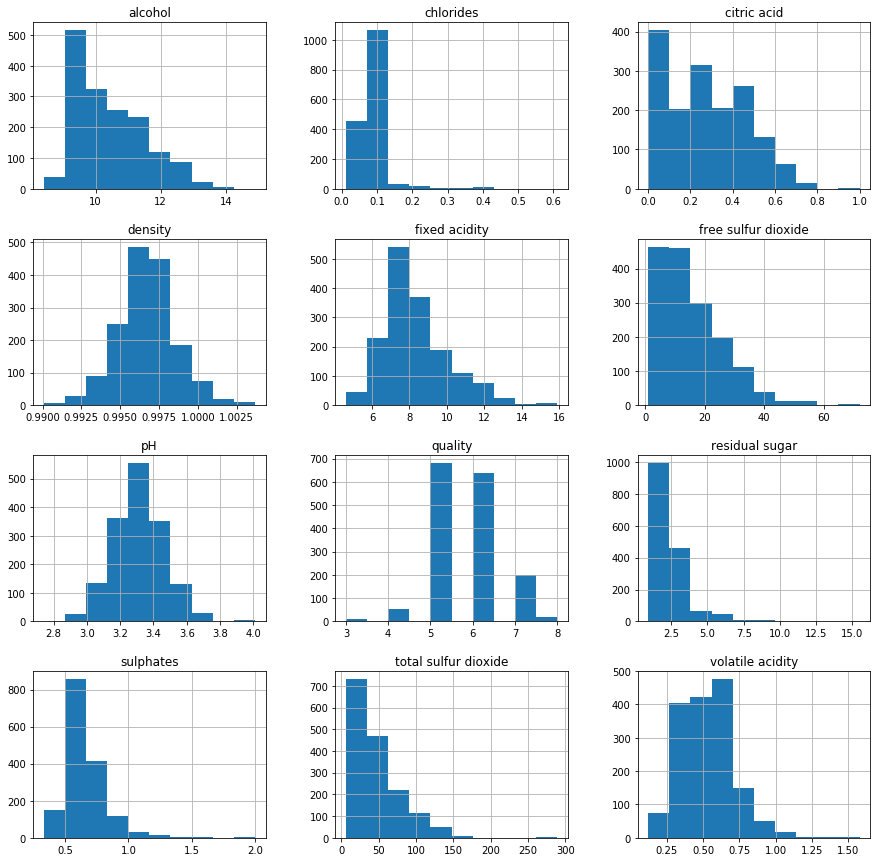

In [5]:
# visualization EDA
pd.DataFrame.hist(df, figsize=[15,15])

In [6]:
# Create predictor variables

X = df.drop('quality', axis=1).values

In [7]:
# Create target variable

y1 = df['quality'].values

In [8]:
y = y1 <= 5

In [9]:
y

In [9]:
y.shape

(1599,)

TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

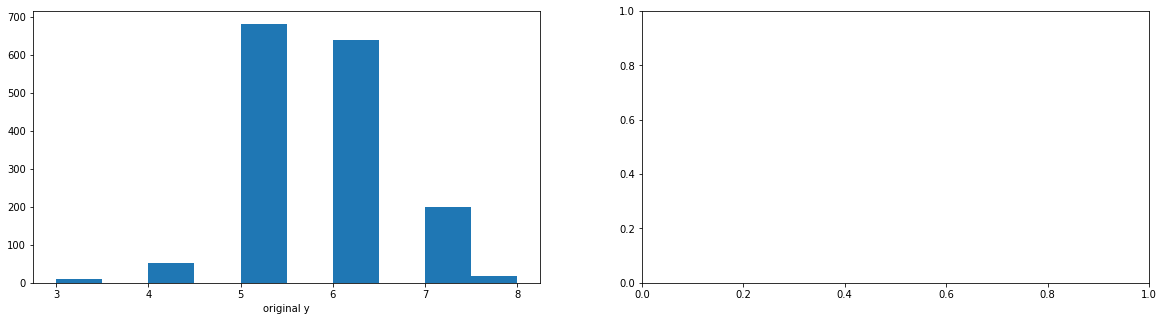

In [11]:
# plot original y and new y 

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.hist(y1)
plt.xlabel('original y')

plt.subplot(1,2,2)
plt.hist(y)
plt.xlabel('new y')

In [13]:
# create train/test 80/20 split

from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.2,
                                                   random_state=42)

In [14]:
# create kNN model and fit model to training data

from sklearn import neighbors, linear_model

knn = neighbors.KNeighborsClassifier(n_neighbors=5)

knn_model1 = knn.fit(X_train, y_train)

In [20]:
# model evaluation
print( 'kNN accuracy for training set: %f' %knn_model1.score(
    X_train, y_train))
print('knn accuracy for test set: %f' %knn_model1.score(
    X_test, y_test))

kNN accuracy for training set: 0.774042
knn accuracy for test set: 0.612500


In [27]:
# actual prediction

y_pred = knn_model1.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.63      0.15      0.24       179
        True       0.45      0.89      0.60       141

   micro avg       0.47      0.47      0.48       320
   macro avg       0.54      0.52      0.42       320
weighted avg       0.55      0.47      0.40       320



Model with scaled data

In [17]:
#Preprocessing predictor variables
from sklearn.preprocessing import scale
X_scaled = scale(X)

In [18]:
# train/test split
from sklearn.model_selection import train_test_split
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [19]:
# kNN#2 using scaled data
knn_model2 = knn.fit(X_scaled_train, y_train)

In [21]:
print('kNN score for trainging set: ', knn_model2.score(X_scaled_train, y_train))
print('kNN score test set: ', knn_model2.score(X_scaled_test, y_test))

kNN score for trainging set:  0.8146989835809226
kNN score test set:  0.7125


In [28]:
y_scaled_pred = knn_model2.predict(X_scaled_test)
print(classification_report(y_test, y_scaled_pred))

              precision    recall  f1-score   support

       False       0.72      0.79      0.75       179
        True       0.70      0.62      0.65       141

   micro avg       0.71      0.71      0.71       320
   macro avg       0.71      0.70      0.70       320
weighted avg       0.71      0.71      0.71       320



In [30]:
# create random forest classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [32]:
clf_model = clf.fit(X_scaled_train, y_train)

In [33]:
print('random classifier for training: ', clf_model.score(X_scaled_train, y_train))
print('random classifier for test: ', clf_model.score(X_scaled_test, y_test))

random classifier for training:  0.9851446442533229
random classifier for test:  0.75625


K-fold  cross Validation

In [35]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import make_scorer, accuracy_score

kfold = kfold(n_split=10, random_state=42)
cv_results = cross_val_score(clf, X_scaled_train, y_train, cv=fold, scoring='accuracy')

NameError: name 'kfold' is not defined

Logistic Regression

In [37]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

logreg = linear_model.LogisticRegression()

#fit model
lr = logreg.fit(X_scaled_train, y_train)


C:\Users\stacy\PycharmProjects\Basics\venv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [41]:
print('logistic regression score for test: ', lr.score(X_scaled_test, y_test))
print('logistic regression score for training: ', lr.score(X_scaled_train, y_train))

logistic regression score for test:  0.740625
logistic regression score for training:  0.7521501172791243
